<a href="https://colab.research.google.com/github/neto-riga/metodos_numericos_2/blob/main/1_m%C3%A9todo_del_punto_fijo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## [Regresar al ínidce](https://github.com/neto-riga/metodos_numericos_2/blob/main/portafolio.md#índice)

#Método del punto fijo

Resolver el siguiente sistema por el método del punto fijo:

$$\begin{eqnarray}
f_{1}(x,y)&=&x^{2}-y-2=0 \\
f_{2}(x,y)&=&2xy-3=0
\end{eqnarray}
$$

1. Graficar las funciones 
2. Obtener las formas iterativas. Sumar $-4x$ a cafa lado de $f_{1}$ y $-5y$ a cada lado de $f_{2}$ 
3. elegir el punto inicial
4. Verificar la convergencia mediante $M$
5. Resolver con desplazamientos simultáneos y sucesivos
6. Calcular el error absoluto con la norma espectral
7. Estimar la solución con una tolerancia de 0.0008

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

Declaramos nustras funciones $f_1$ y $f_2$:

In [ ]:
F = [lambda x: x ** 2 - 2,
    lambda x: 3 / (2 * x)] 

Graficando las funciones

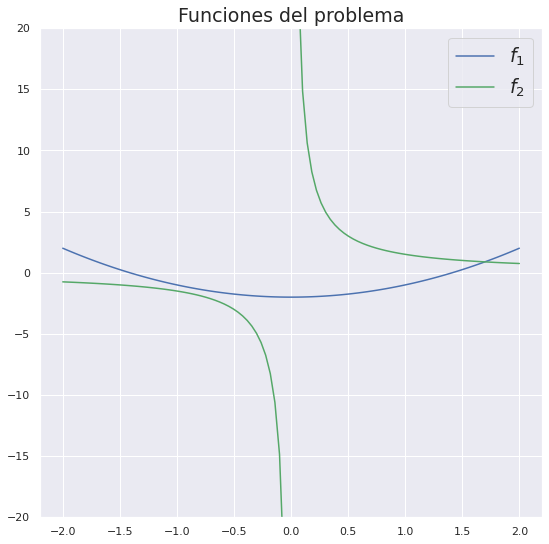

In [ ]:
X = np.linspace(-2, 2, 100)

ax1 = plt.figure(figsize=(9,9))
plt.title(r"Funciones del problema", fontsize = 19)
plt.plot(X, F[0](X))
plt.plot (X[:50], F[1](X[:50]), 'g', X[50:], F[1](X[50:]), 'g')
plt.ylim(-20, 20)
plt.legend([r"$f_1$", r"$f_2$"], fontsize = 19)
plt.show()

Definimos $g_{1}$ y $g_{2}$:

In [ ]:
F=[lambda x,y:(x**2 - 4*x - y -2)/(-4),
   lambda x,y: (2*x*y - 5*y -3)/(-5)] 

Aplicamos el método de forma simultanea, calculamos los errores y mostramos los resultados:

In [ ]:
x=[1]
y=[0.5]
Error = np.zeros((2,1))
Error_abs=[1]
i=0
while Error_abs[i] > 0.0008:
  x.append(F[0](x[i],y[i]))
  y.append(F[1](x[i],y[i]))
  i+=1
  Error[0,0] = x[i] - x[i-1]
  Error[1,0] = y[i] - y[i-1]
  Error_abs.append(np.amax(abs(Error)))
Error_abs[0]=np.nan
tabla = {'xk': x,
        'yk': y,
        'Error a': Error_abs
}
Df = pd.DataFrame(tabla)
Df

,xk,yk,Error a
0,1.000000,0.500000,NaN
1,1.375000,0.900000,0.400000
2,1.627344,1.005000,0.252344
3,1.716532,0.950808,0.089188
4,1.717613,0.897971,0.052837
5,1.704557,0.881024,0.016947
6,1.698434,0.880322,0.006123
7,1.697345,0.882254,0.001932
8,1.697664,0.883258,0.001004
9,1.697963,0.883468,0.000299


El punto en el que se intersecan las curvas es $(1.697963,0.883468)$ con una tolerancia en error absoluto con la norma espectral de 0.000299. 


Ahora utilizamos iteraciones sucesivas, es decir, el método de Gauss-Seidel.

In [ ]:
x=[1]
y=[0.5]
Error = np.zeros((2,1))
Error_abs=[1]
i=0
while Error_abs[i] > 0.0008:
  x.append(F[0](x[i],y[i]))
  y.append(F[1](x[-1],y[i]))
  i+=1
  Error[0,0] = x[i] - x[i-1]
  Error[1,0] = y[i] - y[i-1]
  Error_abs.append(np.amax(abs(Error)))
Error_abs[0]=np.nan
tabla = {'xk': x,
        'yk': y,
        'Error a': Error_abs
}
Df = pd.DataFrame(tabla)
Df

,xk,yk,Error a
0,1.000000,0.500000,NaN
1,1.375000,0.825000,0.375000
2,1.608594,0.894164,0.233594
3,1.685241,0.891411,0.076648
4,1.698085,0.885935,0.012843
5,1.698695,0.883961,0.001973
6,1.698294,0.883471,0.000491


Notamos que el punto está dado por el par ordenado $(1.698294, 0.883471)$, notemos que el resultado fue encontrado con menos iteraciones.

Para analizar su convergencia haremos uso de las derivadas parciales de $f_{1}$ y $f_{2}$, asi: 

$$
\frac{\partial f_{1}(1,0.5)}{\partial x} = -\frac{x}{2}+1 =0.5 \\
\frac{\partial f_{1}(1,0.5)}{\partial y } = \frac{1}{4}
$$
Asì, para $f_{1}, M=0.75<1$, por lo tanto el mètodo converge. 

Para $f_{2}$ tenemos 

$$
\frac{\partial f_{2}(1,0.5)}{\partial x} = -\frac{2}{5}y = -\frac{1}{5}\\
\frac{\partial f_{2}(1,0.5)}{\partial y } = -\frac{2}{5}x+1=\frac{3}{5}
$$
Entonces para $f_{2}, M = \frac{4}{5}<1$

Por lo que podemos decir que el mètodo converge con los valores iniciales que le dimos.

## [Regresar al ínidce](https://github.com/neto-riga/metodos_numericos_2/blob/main/portafolio.md#índice)